In [1]:
import rasterio
from rasterio.plot import show
from sklearn.cluster import KMeans, MeanShift
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import estimate_bandwidth

C:\Users\Hacker\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
image = rasterio.open('GRAY_HR_SR_OB.tif')

In [3]:
image.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 21600,
 'height': 10800,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.01666666666667, 0.0, -180.0,
        0.0, -0.01666666666667, 90.00000000000001)}

In [4]:
image_arr = image.read()

In [5]:
np.shape(image_arr)

(1, 10800, 21600)

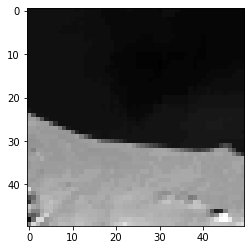

In [6]:
plt.imshow(image_arr[0][3120:3170, 13750:13800], cmap='gray')

In [7]:
hormoz_image = image_arr[0][3120:3170, 13750:13800]

In [8]:
hormoz_image

array([[101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       ...,
       [127, 123, 130, ..., 148, 148, 147],
       [101, 129, 162, ..., 151, 150, 154],
       [135, 162, 152, ..., 154, 160, 163]], dtype=uint8)

In [9]:
np.shape(hormoz_image)

(50, 50)

In [10]:
from sklearn.feature_extraction.image import img_to_graph

In [11]:
img_to_graph(hormoz_image)

<2500x2500 sparse matrix of type '<class 'numpy.uint8'>'
	with 12300 stored elements in COOrdinate format>

In [12]:
cm = img_to_graph(hormoz_image).todense()

In [13]:
cm

matrix([[101,   0,   0, ...,   0,   0,   0],
        [  0, 101,   0, ...,   0,   0,   0],
        [  0,   0, 101, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 154, 250,   0],
        [  0,   0,   0, ..., 250, 160, 253],
        [  0,   0,   0, ...,   0, 253, 163]], dtype=uint8)

In [15]:
import threadpoolctl

In [16]:
threadpoolctl .__version__

'3.1.0'

In [17]:
msh = MeanShift(n_jobs=-1)
msh.fit(cm)

C:\Users\Hacker\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


MeanShift(n_jobs=-1)

In [19]:
labels = msh.labels_

In [20]:
np.unique(labels, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [21]:
labels_im = np.full(np.shape(hormoz_image), -1.)

In [22]:
labels_im

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [23]:
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

In [24]:
hormoz_cls

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [25]:
labels_im

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0., 130., 853., ..., 890., 891., 892.],
       [132., 893., 130., ..., 932., 933., 934.],
       [935., 132.,   0., ..., 962., 963., 964.]])

In [26]:
hormoz_image

array([[101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       ...,
       [127, 123, 130, ..., 148, 148, 147],
       [101, 129, 162, ..., 151, 150, 154],
       [135, 162, 152, ..., 154, 160, 163]], dtype=uint8)

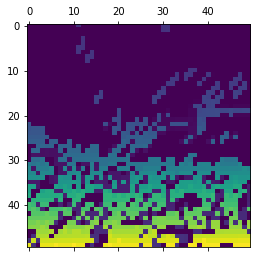

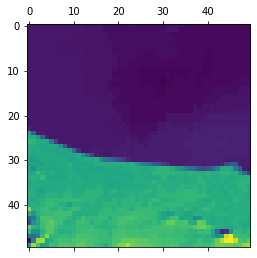

In [27]:
plt.matshow(labels_im)
plt.matshow(hormoz_image)